# Task2 Of Mini Project 1
## AmirHossein Hadinezhad, Andrei Serban, Gabriel Alejandro Martinica Ardon

In [126]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import statistics
from numpy import mean
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

### Loading the data (part2)

In [31]:
dataset = pd.read_csv("drug200.csv")
#debug lines
# print(np.count_nonzero(dataset==np.nan))
# print(dataset.head())


### Distribution Graph (Part3)

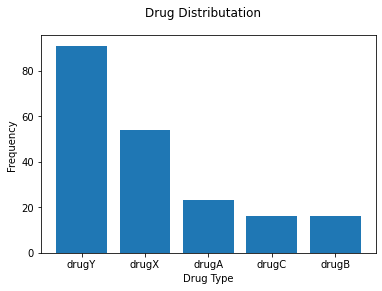

In [32]:

distributation = dataset.Drug.value_counts()

# dataset[-1].plot(kind='hist');
y = distributation.values
x = distributation.index
plt.plot()
plt.ylabel('Frequency')
plt.xlabel('Drug Type')
plt.bar(x, y)
plt.suptitle("Drug Distributation")
plt.savefig("Drug Distributation.pdf", format="pdf")
plt.show()

### Convering the data  (Part4)

In [33]:
dataset.BP = pd.Categorical(dataset.BP, ["LOW", "NORMAL", "HIGH"], ordered=True)

dataset.Cholesterol = pd.Categorical(dataset.Cholesterol, ["LOW", "NORMAL", "HIGH"], ordered=True)

dataset.BP = dataset.BP.cat.codes
dataset.Cholesterol = dataset.Cholesterol.cat.codes


features = dataset.iloc[:, :-1]
targets = dataset.iloc[:, -1]

features = pd.get_dummies(features, columns=['Sex'], prefix="Gender", prefix_sep=": ")
# targets = pd.get_dummies(targets, columns=['Drug'], prefix="Drug type", prefix_sep=": ")
# debug lines
# print(dataset.head())
# print(features)
# print(targets)

### Split dataset for training and test (part5)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(features.values, targets.values)

 ### Train using Gaussian Naive Bayes Classifie (part6a)

In [35]:
gaussian_naive_bayes_training = GaussianNB()
gaussian_naive_bayes_training.fit(X_train, y_train)

GaussianNB()

 ### Train using  Decision Tree (part6b)

In [108]:
clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)

In [120]:
print("c)")
top_DT_parameters = {'criterion': ['entropy', 'gini'],
                     'max_depth': (2, 4), 
                     'min_samples_split': (2, 3, 7)}

clf_topdt = GridSearchCV(clf, top_DT_parameters)

clf_topdt.fit(X_train, y_train)

pred_result_gridsearch = clf_topdt.predict(X_test)
dict = clf_topdt.get_params()
print(dict['estimator__criterion'])
print(dict)

c)
gini
{'cv': None, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': 3, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 0, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(max_leaf_nodes=3, random_state=0), 'n_jobs': None, 'param_grid': {'criterion': ['entropy', 'gini'], 'max_depth': (2, 4), 'min_samples_split': (2, 3, 7)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': False, 'scoring': None, 'verbose': 0}


In [38]:
print("d)")

clf_perceptron = Perceptron()
clf_perceptron.fit(X_train, y_train)
pred_result_perceptron = clf_perceptron.predict(X_test)

d)


In [39]:
print("e)")

clf_mlp = MLPClassifier(hidden_layer_sizes=(100), activation='logistic', solver='sgd')
clf_mlp.fit(X_train, y_train)
pred_result_mlp = clf_mlp.predict(X_test)

e)


C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [40]:
print("f)")

top_MLP_parameters = {'activation': ('logistic', 'tanh', 'relu', 'identity'),
                  'hidden_layer_sizes': ((30, 50), (10, 10, 10)),
                  'solver': ('adam', 'sgd')}

clf_top_mlp = GridSearchCV(clf_mlp, top_MLP_parameters)
clf_top_mlp.fit(X_train, y_train)
pred_result_top_mlp = clf_top_mlp.predict(X_test)

f)


C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\en

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\en

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\en

## Part 7

 #### Gaussian Naive Bayes Classifier

In [41]:
f = open("drugs-performance.txt", "a")
f.write("\n\n\n\n\t**********************************\n")
f.write("\n\tGaussian Naive Bayes Classifier\n\n\n")
f.close()

In [42]:
gaussian_naive_bayes_training = GaussianNB()
gaussian_naive_bayes_training.fit(X_train, y_train)

GaussianNB()

#### the confusion matrix

In [43]:
f = open("drugs-performance.txt", "a")
f.write("\nConfusion Matrix: \n")
y_predicted = gaussian_naive_bayes_training.predict(X_test)
f.write(repr(confusion_matrix(y_test, y_predicted)))
f.close()

#### The precision, recall, and F1-measure for each class

In [44]:
f = open("drugs-performance.txt", "a")
f.write("\nThe precision, recall, and F1-measure\n")
f.write((classification_report(y_test, y_predicted,target_names=["DrugA","DrugB","DrugC","DrugX","DrugY"])))
f.write("\n")
f.close()

#### the accuracy, macro-average F1 and weighted-average F1 of the model

In [45]:
f = open("drugs-performance.txt", "a")
f.write("\nAccuracy, macro-average F1 and weighted-average F1:\n")
f.write("Accuracy score: " + repr(accuracy_score(y_test, y_predicted)) +"\n")
f.write("Macro F1 average: " + repr(f1_score(y_test, y_predicted, average='macro'))+"\n")
f.write("Weighted F1 average: " + repr(f1_score(y_test, y_predicted, average='weighted'))+"\n")
f.write("\n")
f.close()

### Decision Tree

In [46]:
f = open("drugs-performance.txt", "a")
f.write("\n\n\n\n\t**********************************\n")
f.write("\n\tDecision Tree\n\n\n")
f.close()

In [47]:
clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)

#### the confusion matrix

In [48]:
f = open("drugs-performance.txt", "a")
f.write("\nConfusion Matrix: \n")
y_predicted = clf.predict(X_test)
f.write(repr(confusion_matrix(y_test, y_predicted)))
f.close()

#### The precision, recall, and F1-measure for each class

In [49]:
f = open("drugs-performance.txt", "a")
f.write("\nThe precision, recall, and F1-measure\n")
f.write((classification_report(y_test, y_predicted,target_names=["DrugA","DrugB","DrugC","DrugX","DrugY"])))
f.write("\n")
f.close()

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### the accuracy, macro-average F1 and weighted-average F1 of the model

In [50]:
f = open("drugs-performance.txt", "a")
f.write("\nAccuracy, macro-average F1 and weighted-average F1:\n")
f.write("Accuracy score: " + repr(accuracy_score(y_test, y_predicted)) +"\n")
f.write("Macro F1 average: " + repr(f1_score(y_test, y_predicted, average='macro'))+"\n")
f.write("Weighted F1 average: " + repr(f1_score(y_test, y_predicted, average='weighted'))+"\n")
f.write("\n")
f.close()

### Top - Decision Tree

In [51]:
f = open("drugs-performance.txt", "a")
f.write("\n\n\n\n\t**********************************\n")
f.write("\n\tTop Decision Tree\n\n\n")
f.close()

In [52]:
top_DT_parameters = {'criterion': ['entropy', 'gini'],
                     'max_depth': (2, 4), 
                     'min_samples_split': (2, 3, 7)}

clf_topdt = GridSearchCV(clf, top_DT_parameters)

clf_topdt.fit(X_train, y_train)

pred_result_gridsearch = clf_topdt.predict(X_test)

#### the confusion matrix

In [58]:
f = open("drugs-performance.txt", "a")
f.write("\nConfusion Matrix: \n")
y_predicted = clf_topdt.predict(X_test)
f.write(repr(confusion_matrix(y_test, y_predicted)))
f.close()

#### The precision, recall, and F1-measure for each class

In [59]:
f = open("drugs-performance.txt", "a")
f.write("\nThe precision, recall, and F1-measure\n")
f.write((classification_report(y_test, y_predicted,target_names=["DrugA","DrugB","DrugC","DrugX","DrugY"])))
f.write("\n")
f.close()

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### the accuracy, macro-average F1 and weighted-average F1 of the model

In [60]:
f = open("drugs-performance.txt", "a")
f.write("\nAccuracy, macro-average F1 and weighted-average F1:\n")
f.write("Accuracy score: " + repr(accuracy_score(y_test, y_predicted)) +"\n")
f.write("Macro F1 average: " + repr(f1_score(y_test, y_predicted, average='macro'))+"\n")
f.write("Weighted F1 average: " + repr(f1_score(y_test, y_predicted, average='weighted'))+"\n")
f.write("\n")
f.close()

### Perceptron

In [61]:
f = open("drugs-performance.txt", "a")
f.write("\n\n\n\n\t**********************************\n")
f.write("\n\tPerceptron\n\n\n")
f.close()

In [62]:
clf_perceptron = Perceptron()
clf_perceptron.fit(X_train, y_train)

Perceptron()

#### the confusion matrix

In [63]:
f = open("drugs-performance.txt", "a")
f.write("\nConfusion Matrix: \n")
y_predicted = clf_perceptron.predict(X_test)
f.write(repr(confusion_matrix(y_test, y_predicted)))
f.close()

#### The precision, recall, and F1-measure for each class

In [64]:
f = open("drugs-performance.txt", "a")
f.write("\nThe precision, recall, and F1-measure\n")
f.write((classification_report(y_test, y_predicted,target_names=["DrugA","DrugB","DrugC","DrugX","DrugY"])))
f.write("\n")
f.close()

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### the accuracy, macro-average F1 and weighted-average F1 of the model

In [65]:
f = open("drugs-performance.txt", "a")
f.write("\nAccuracy, macro-average F1 and weighted-average F1:\n")
f.write("Accuracy score: " + repr(accuracy_score(y_test, y_predicted)) +"\n")
f.write("Macro F1 average: " + repr(f1_score(y_test, y_predicted, average='macro'))+"\n")
f.write("Weighted F1 average: " + repr(f1_score(y_test, y_predicted, average='weighted'))+"\n")
f.write("\n")
f.close()

### Multi-Layered Perceptron

In [66]:
f = open("drugs-performance.txt", "a")
f.write("\n\n\n\n\t**********************************\n")
f.write("\n\tMulti-Layered Perceptron\n\n\n")
f.close()

In [67]:
clf_mlp = MLPClassifier(hidden_layer_sizes=(100), activation='logistic', solver='sgd')
clf_mlp.fit(X_train, y_train)

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=100, solver='sgd')

#### the confusion matrix

In [68]:
f = open("drugs-performance.txt", "a")
f.write("\nConfusion Matrix: \n")
y_predicted = clf_mlp.predict(X_test)
f.write(repr(confusion_matrix(y_test, y_predicted)))
f.close()

#### The precision, recall, and F1-measure for each class

In [69]:
f = open("drugs-performance.txt", "a")
f.write("\nThe precision, recall, and F1-measure\n")
f.write((classification_report(y_test, y_predicted,target_names=["DrugA","DrugB","DrugC","DrugX","DrugY"])))
f.write("\n")
f.close()

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### the accuracy, macro-average F1 and weighted-average F1 of the model

In [70]:
f = open("drugs-performance.txt", "a")
f.write("\nAccuracy, macro-average F1 and weighted-average F1:\n")
f.write("Accuracy score: " + repr(accuracy_score(y_test, y_predicted)) +"\n")
f.write("Macro F1 average: " + repr(f1_score(y_test, y_predicted, average='macro'))+"\n")
f.write("Weighted F1 average: " + repr(f1_score(y_test, y_predicted, average='weighted'))+"\n")
f.write("\n")
f.close()

### Top-Multi-Layered Perceptron

In [71]:
f = open("drugs-performance.txt", "a")
f.write("\n\n\n\n\t**********************************\n")
f.write("\n\tTop-Multi-Layered Perceptron\n\n\n")
f.close()

In [72]:
top_MLP_parameters = {'activation': ('logistic', 'tanh', 'relu', 'identity'),
                  'hidden_layer_sizes': ((30, 50), (10, 10, 10)),
                  'solver': ('adam', 'sgd')}

clf_top_mlp = GridSearchCV(clf_mlp, top_MLP_parameters)
clf_top_mlp.fit(X_train, y_train)

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\en

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\en

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(estimator=MLPClassifier(activation='logistic',
                                     hidden_layer_sizes=100, solver='sgd'),
             param_grid={'activation': ('logistic', 'tanh', 'relu', 'identity'),
                         'hidden_layer_sizes': ((30, 50), (10, 10, 10)),
                         'solver': ('adam', 'sgd')})

#### the confusion matrix

In [73]:
f = open("drugs-performance.txt", "a")
f.write("\nConfusion Matrix: \n")
y_predicted = clf_top_mlp.predict(X_test)
f.write(repr(confusion_matrix(y_test, y_predicted)))
f.close()

#### The precision, recall, and F1-measure for each class

In [74]:
f = open("drugs-performance.txt", "a")
f.write("\nThe precision, recall, and F1-measure\n")
f.write((classification_report(y_test, y_predicted,target_names=["DrugA","DrugB","DrugC","DrugX","DrugY"])))
f.write("\n")
f.close()

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### the accuracy, macro-average F1 and weighted-average F1 of the model

In [75]:
f = open("drugs-performance.txt", "a")
f.write("\nAccuracy, macro-average F1 and weighted-average F1:\n")
f.write("Accuracy score: " + repr(accuracy_score(y_test, y_predicted)) +"\n")
f.write("Macro F1 average: " + repr(f1_score(y_test, y_predicted, average='macro'))+"\n")
f.write("Weighted F1 average: " + repr(f1_score(y_test, y_predicted, average='weighted'))+"\n")
f.write("\n")
f.close()

## Step 8

### Gaussian Naive Bayes Classifier

In [137]:
#gaussian_naive_bayes_training = GaussianNB()
#gaussian_naive_bayes_training.fit(X_train, y_train)

f = open("drugs-performance.txt", "a")
f.write("\nRunning 10 - Gaussian Naive Bayes Classifier:\n")

Accuracy_list = []
Macro_F1_list = []
Weighted_F1_list = []

top_MLP_parameters = {'activation': ('logistic', 'tanh', 'relu', 'identity'),
                  'hidden_layer_sizes': ((30, 50), (10, 10, 10)),
                  'solver': ('adam', 'sgd')}

for i in range(10):
    gaussian_naive_bayes_training = GaussianNB()
    gaussian_naive_bayes_training.fit(X_train, y_train)
    y_predicted = gaussian_naive_bayes_training.predict(X_test)
    Accuracy_list.append(accuracy_score(y_test, y_predicted))
    Macro_F1_list.append(f1_score(y_test, y_predicted, average='macro'))
    Weighted_F1_list.append(f1_score(y_test, y_predicted, average='weighted'))
Accuracy_avg = mean(Accuracy_list)
Macro_F1_avg = mean(Macro_F1_list)
Weighted_F1_avg = mean(Weighted_F1_list)
f.write("Average accuracy: " + repr(Accuracy_avg) + "\n")
f.write("Average macro-average F1: " + repr(Macro_F1_avg) + "\n")
f.write("Average weighted-average F1: " + repr(Weighted_F1_avg) + "\n")
f.write("Accuracy Standard Deviation: " + repr(statistics.stdev(Accuracy_list)) + "\n")
f.write("Macro-average Standard Deviation: " + repr(statistics.stdev(Macro_F1_list)) + "\n")
f.write("Weighted-average Standard Deviation: " + repr(statistics.stdev(Weighted_F1_list)) + "\n")
f.write("\n")
f.close()
print(Accuracy_list)
print(Macro_F1_list)
print(Weighted_F1_list)
print("Accuracy Standard Deviation: " + (str)(statistics.stdev(Accuracy_list)))
print("Macro-average Standard Deviation: " + (str)(statistics.stdev(Macro_F1_list)))
print("Weighted-average Standard Deviation: " + (str)(statistics.stdev(Weighted_F1_list)))
print("Average accuracy: " + (str)(Accuracy_avg))
print("Average macro-average F1: " + (str)(Macro_F1_avg))
print("Weighted-average Standard Deviation: " + (str)(Weighted_F1_avg))

[0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86]
[0.8640350877192983, 0.8640350877192983, 0.8640350877192983, 0.8640350877192983, 0.8640350877192983, 0.8640350877192983, 0.8640350877192983, 0.8640350877192983, 0.8640350877192983, 0.8640350877192983]
[0.8668245614035088, 0.8668245614035088, 0.8668245614035088, 0.8668245614035088, 0.8668245614035088, 0.8668245614035088, 0.8668245614035088, 0.8668245614035088, 0.8668245614035088, 0.8668245614035088]
Accuracy Standard Deviation: 0.0
Macro-average Standard Deviation: 0.0
Weighted-average Standard Deviation: 0.0
Average accuracy: 0.86
Average macro-average F1: 0.8640350877192983
Weighted-average Standard Deviation: 0.8668245614035088


### Decision Tree

In [138]:
# clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
# clf.fit(X_train, y_train)

f = open("drugs-performance.txt", "a")
f.write("\nRunning 10 - Decision Tree:\n")

Accuracy_list = []
Macro_F1_list = []
Weighted_F1_list = []

for i in range(10):
    clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
    clf.fit(X_train, y_train)
    y_predicted = clf.predict(X_test)
    Accuracy_list.append(accuracy_score(y_test, y_predicted))
    Macro_F1_list.append(f1_score(y_test, y_predicted, average='macro'))
    Weighted_F1_list.append(f1_score(y_test, y_predicted, average='weighted'))
Accuracy_avg = mean(Accuracy_list)
Macro_F1_avg = mean(Macro_F1_list)
Weighted_F1_avg = mean(Weighted_F1_list)
f.write("Average accuracy: " + repr(Accuracy_avg) + "\n")
f.write("Average macro-average F1: " + repr(Macro_F1_avg) + "\n")
f.write("Average weighted-average F1: " + repr(Weighted_F1_avg) + "\n")
f.write("Accuracy Standard Deviation: " + repr(statistics.stdev(Accuracy_list)) + "\n")
f.write("Macro-average Standard Deviation: " + repr(statistics.stdev(Macro_F1_list)) + "\n")
f.write("Weighted-average Standard Deviation: " + repr(statistics.stdev(Weighted_F1_list)) + "\n")
f.write("\n")
f.close()
print(Accuracy_list)
print(Macro_F1_list)
print(Weighted_F1_list)
print("Accuracy Standard Deviation: " + (str)(statistics.stdev(Accuracy_list)))
print("Macro-average Standard Deviation: " + (str)(statistics.stdev(Macro_F1_list)))
print("Weighted-average Standard Deviation: " + (str)(statistics.stdev(Weighted_F1_list)))
print("Average accuracy: " + (str)(Accuracy_avg))
print("Average macro-average F1: " + (str)(Macro_F1_avg))
print("Weighted-average Standard Deviation: " + (str)(Weighted_F1_avg))

[0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86]
[0.5365253077975376, 0.5365253077975376, 0.5365253077975376, 0.5365253077975376, 0.5365253077975376, 0.5365253077975376, 0.5365253077975376, 0.5365253077975376, 0.5365253077975376, 0.5365253077975376]
[0.8078796169630644, 0.8078796169630644, 0.8078796169630644, 0.8078796169630644, 0.8078796169630644, 0.8078796169630644, 0.8078796169630644, 0.8078796169630644, 0.8078796169630644, 0.8078796169630644]
Accuracy Standard Deviation: 0.0
Macro-average Standard Deviation: 0.0
Weighted-average Standard Deviation: 0.0
Average accuracy: 0.86
Average macro-average F1: 0.5365253077975376
Weighted-average Standard Deviation: 0.8078796169630644


### Top-Decision Tree

In [139]:
f = open("drugs-performance.txt", "a")
f.write("\nRunning 10 - Decision Tree:\n")

Accuracy_list = []
Macro_F1_list = []
Weighted_F1_list = []

top_DT_parameters = {'criterion': ['entropy', 'gini'],
                     'max_depth': (2, 4), 
                     'min_samples_split': (2, 3, 7)}
clf_topdt = GridSearchCV(clf, top_DT_parameters)

clf_topdt.fit(X_train, y_train)

pred_result_gridsearch = clf_topdt.predict(X_test)
param_list = clf_topdt.get_params()
print(dict['estimator__criterion'])
print(dict)

for i in range(10):
    clf_topdt = GridSearchCV(clf, top_DT_parameters)
    clf_topdt.fit(X_train, y_train)
    y_predicted = clf_topdt.predict(X_test)
    Accuracy_list.append(accuracy_score(y_test, y_predicted))
    Macro_F1_list.append(f1_score(y_test, y_predicted, average='macro'))
    Weighted_F1_list.append(f1_score(y_test, y_predicted, average='weighted'))
Accuracy_avg = mean(Accuracy_list)
Macro_F1_avg = mean(Macro_F1_list)
Weighted_F1_avg = mean(Weighted_F1_list)
f.write("Average accuracy: " + repr(Accuracy_avg) + "\n")
f.write("Average macro-average F1: " + repr(Macro_F1_avg) + "\n")
f.write("Average weighted-average F1: " + repr(Weighted_F1_avg) + "\n")
f.write("Accuracy Standard Deviation: " + repr(statistics.stdev(Accuracy_list)) + "\n")
f.write("Macro-average Standard Deviation: " + repr(statistics.stdev(Macro_F1_list)) + "\n")
f.write("Weighted-average Standard Deviation: " + repr(statistics.stdev(Weighted_F1_list)) + "\n")
f.write("\n")
f.close()
print(Accuracy_list)
print(Macro_F1_list)
print(Weighted_F1_list)
print("Accuracy Standard Deviation: " + (str)(statistics.stdev(Accuracy_list)))
print("Macro-average Standard Deviation: " + (str)(statistics.stdev(Macro_F1_list)))
print("Weighted-average Standard Deviation: " + (str)(statistics.stdev(Weighted_F1_list)))
print("Average accuracy: " + (str)(Accuracy_avg))
print("Average macro-average F1: " + (str)(Macro_F1_avg))
print("Weighted-average Standard Deviation: " + (str)(Weighted_F1_avg))

gini
{'cv': None, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': 3, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 0, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(max_leaf_nodes=3, random_state=0), 'n_jobs': None, 'param_grid': {'criterion': ['entropy', 'gini'], 'max_depth': (2, 4), 'min_samples_split': (2, 3, 7)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': False, 'scoring': None, 'verbose': 0}
[0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86]
[0.5365253077975376, 0.5365253077975376, 0.5365253077975376, 0.5365253077975376, 0.5365253077975376, 0.5365253077975376, 0.5365253077975376, 0.5365253077975376, 0.5365253077975376, 0.5365253077975376]
[0.

### Perceptron

In [134]:
f = open("drugs-performance.txt", "a")
f.write("\nRunning 10 - Perceptron:\n")

Accuracy_list = []
Macro_F1_list = []
Weighted_F1_list = []

for i in range(10):
    clf_perceptron = Perceptron()
    clf_perceptron.fit(X_train, y_train)
    y_predicted = clf_perceptron.predict(X_test)
    Accuracy_list.append(accuracy_score(y_test, y_predicted))
    Macro_F1_list.append(f1_score(y_test, y_predicted, average='macro'))
    Weighted_F1_list.append(f1_score(y_test, y_predicted, average='weighted'))
Accuracy_avg = mean(Accuracy_list)
Macro_F1_avg = mean(Macro_F1_list)
Weighted_F1_avg = mean(Weighted_F1_list)
f.write("Average accuracy: " + repr(Accuracy_avg) + "\n")
f.write("Average macro-average F1: " + repr(Macro_F1_avg) + "\n")
f.write("Average weighted-average F1: " + repr(Weighted_F1_avg) + "\n")
f.write("Accuracy Standard Deviation: " + repr(statistics.stdev(Accuracy_list)) + "\n")
f.write("Macro-average Standard Deviation: " + repr(statistics.stdev(Macro_F1_list)) + "\n")
f.write("Weighted-average Standard Deviation: " + repr(statistics.stdev(Weighted_F1_list)) + "\n")
f.write("\n")
f.close()
print(Accuracy_list)
print(Macro_F1_list)
print(Weighted_F1_list)
print("Accuracy Standard Deviation: " + (str)(statistics.stdev(Accuracy_list)))
print("Macro-average Standard Deviation: " + (str)(statistics.stdev(Macro_F1_list)))
print("Weighted-average Standard Deviation: " + (str)(statistics.stdev(Weighted_F1_list)))
print("Average accuracy: " + (str)(Accuracy_avg))
print("Average macro-average F1: " + (str)(Macro_F1_avg))
print("Weighted-average Standard Deviation: " + (str)(Weighted_F1_avg))

[0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62]
[0.27908496732026145, 0.27908496732026145, 0.27908496732026145, 0.27908496732026145, 0.27908496732026145, 0.27908496732026145, 0.27908496732026145, 0.27908496732026145, 0.27908496732026145, 0.27908496732026145]
[0.5249673202614379, 0.5249673202614379, 0.5249673202614379, 0.5249673202614379, 0.5249673202614379, 0.5249673202614379, 0.5249673202614379, 0.5249673202614379, 0.5249673202614379, 0.5249673202614379]
Accuracy Standard Deviation: 0.0
Macro-average Standard Deviation: 0.0
Weighted-average Standard Deviation: 0.0
Average accuracy:0.62
0.27908496732026145
0.5249673202614379


### Multi-Layered Perceptron

In [135]:
f = open("drugs-performance.txt", "a")
f.write("\nRunning 10 - Multi-Layered Perceptron:\n")

Accuracy_list = []
Macro_F1_list = []
Weighted_F1_list = []

for i in range(10):
    clf_mlp = MLPClassifier(hidden_layer_sizes=(100), activation='logistic', solver='sgd')
    clf_mlp.fit(X_train, y_train)
    y_predicted = clf_mlp.predict(X_test)
    Accuracy_list.append(accuracy_score(y_test, y_predicted))
    Macro_F1_list.append(f1_score(y_test, y_predicted, average='macro'))
    Weighted_F1_list.append(f1_score(y_test, y_predicted, average='weighted'))
Accuracy_avg = mean(Accuracy_list)
Macro_F1_avg = mean(Macro_F1_list)
Weighted_F1_avg = mean(Weighted_F1_list)
f.write("Average accuracy: " + repr(Accuracy_avg) + "\n")
f.write("Average macro-average F1: " + repr(Macro_F1_avg) + "\n")
f.write("Average weighted-average F1: " + repr(Weighted_F1_avg) + "\n")
f.write("Accuracy Standard Deviation: " + repr(statistics.stdev(Accuracy_list)) + "\n")
f.write("Macro-average Standard Deviation: " + repr(statistics.stdev(Macro_F1_list)) + "\n")
f.write("Weighted-average Standard Deviation: " + repr(statistics.stdev(Weighted_F1_list)) + "\n")
f.write("\n")
f.close()
print(Accuracy_list)
print(Macro_F1_list)
print(Weighted_F1_list)
print("Accuracy Standard Deviation: " + (str)(statistics.stdev(Accuracy_list)))
print("Macro-average Standard Deviation: " + (str)(statistics.stdev(Macro_F1_list)))
print("Weighted-average Standard Deviation: " + (str)(statistics.stdev(Weighted_F1_list)))
print("Average accuracy: " + (str)(Accuracy_avg))
print("Average macro-average F1: " + (str)(Macro_F1_avg))
print("Weighted-average Standard Deviation: " + (str)(Weighted_F1_avg))

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\en

[0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52]
[0.21548387096774194, 0.21548387096774194, 0.21548387096774194, 0.21548387096774194, 0.21462799495586382, 0.21548387096774194, 0.21548387096774194, 0.21548387096774194, 0.21548387096774194, 0.21548387096774194]
[0.41251612903225804, 0.41251612903225804, 0.41251612903225804, 0.41251612903225804, 0.41225725094577553, 0.41251612903225804, 0.41251612903225804, 0.41251612903225804, 0.41251612903225804, 0.41251612903225804]
Accuracy Standard Deviation: 0.0
Macro-average Standard Deviation: 0.000270651759223617
Weighted-average Standard Deviation: 8.186443895907657e-05
Average accuracy: 0.5199999999999999
Average macro-average F1: 0.21539828336655414
Weighted-average Standard Deviation: 0.4124902412236097


C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Top-Multi-Layered Perceptron

In [136]:
f = open("drugs-performance.txt", "a")
f.write("\nRunning 10 - Multi-Layered Perceptron:\n")

Accuracy_list = []
Macro_F1_list = []
Weighted_F1_list = []

top_MLP_parameters = {'activation': ('logistic', 'tanh', 'relu', 'identity'),
                  'hidden_layer_sizes': ((30, 50), (10, 10, 10)),
                  'solver': ('adam', 'sgd')}

for i in range(10):
    clf_top_mlp = GridSearchCV(clf_mlp, top_MLP_parameters)
    clf_top_mlp.fit(X_train, y_train)
    y_predicted = clf_top_mlp.predict(X_test)
    Accuracy_list.append(accuracy_score(y_test, y_predicted))
    Macro_F1_list.append(f1_score(y_test, y_predicted, average='macro'))
    Weighted_F1_list.append(f1_score(y_test, y_predicted, average='weighted'))
Accuracy_avg = mean(Accuracy_list)
Macro_F1_avg = mean(Macro_F1_list)
Weighted_F1_avg = mean(Weighted_F1_list)
f.write("Average accuracy: " + repr(Accuracy_avg) + "\n")
f.write("Average macro-average F1: " + repr(Macro_F1_avg) + "\n")
f.write("Average weighted-average F1: " + repr(Weighted_F1_avg) + "\n")
f.write("Accuracy Standard Deviation: " + repr(statistics.stdev(Accuracy_list)) + "\n")
f.write("Macro-average Standard Deviation: " + repr(statistics.stdev(Macro_F1_list)) + "\n")
f.write("Weighted-average Standard Deviation: " + repr(statistics.stdev(Weighted_F1_list)) + "\n")
f.write("\n")
f.close()
print(Accuracy_list)
print(Macro_F1_list)
print(Weighted_F1_list)
print("Accuracy Standard Deviation: " + (str)(statistics.stdev(Accuracy_list)))
print("Macro-average Standard Deviation: " + (str)(statistics.stdev(Macro_F1_list)))
print("Weighted-average Standard Deviation: " + (str)(statistics.stdev(Weighted_F1_list)))
print("Average accuracy: " + (str)(Accuracy_avg))
print("Average macro-average F1: " + (str)(Macro_F1_avg))
print("Weighted-average Standard Deviation: " + (str)(Weighted_F1_avg))

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\en

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\en

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\en

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\en

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\en

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\en

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\en

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\en

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\en

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\en

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\en

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\en

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\en

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\en

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\en

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\en

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\en

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\en

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\en

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\en

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\en

[0.9, 0.86, 0.88, 0.8, 0.82, 0.78, 0.9, 0.86, 0.84, 0.88]
[0.9081259370314843, 0.6958333333333334, 0.842608695652174, 0.6366544387380777, 0.7158485273492285, 0.6555665024630543, 0.7606060606060606, 0.7374474053295933, 0.68411407199626, 0.7072727272727273]
[0.8963058470764618, 0.8306666666666667, 0.8694782608695653, 0.7666754707752506, 0.7923141654978961, 0.7466206896551725, 0.8724242424242425, 0.8312201963534364, 0.8098868630201028, 0.8510909090909089]
Accuracy Standard Deviation: 0.04131182235954578
Macro-average Standard Deviation: 0.0839648671083071
Weighted-average Standard Deviation: 0.04816342569906953
Average accuracy: 0.8520000000000001
Average macro-average F1: 0.7344077699771993
Weighted-average Standard Deviation: 0.8266683311429703


C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
